**VGG-19 model implemented using Keras**





In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

# Create the base pre-trained model
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
base_model = VGG19(weights='imagenet', include_top=False)
batch_size = 32  # batch size is chosen to help keep GPU memory usage low
dim = 299  # InceptionV3 is trained on 299x299 images

W0811 11:18:04.867418 139674429736832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 11:18:04.920784 139674429736832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 11:18:04.929064 139674429736832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 11:18:04.979176 139674429736832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



80142336/80134624 [==============================] - 3s 0us/step


W0811 11:18:09.604205 139674429736832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0811 11:18:09.605821 139674429736832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:
num_training_img = 1470  # number of training images for 102 dataset
# num_training_img = 1190 # number of training images for 17 dataset
num_val_img = 350  # number of validation images for 102 dataset
# num_val_img = 170 # number of validation images for 17 dataset
# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

In [0]:
# Select 102 or 17 for whichever model you want to train on.
predictions = Dense(7, activation='softmax')(x)
# predictions = Dense(17, activation='softmax')(x)

In [5]:
model = Model(input=base_model.input, output=predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

W0811 11:18:36.594140 139674429736832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,  # regularize RGB color values to floats between 0.0 to 1.0
    horizontal_flip=True,
    fill_mode='constant')  # i

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [10]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/widerdata/images')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [11]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/widerdata/images',  # this is the target directory
    target_size=(dim, dim),  # all images will be resized to dim * dim
    batch_size=batch_size,
    class_mode='categorical')

Found 1470 images belonging to 7 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Validation/images',
    target_size=(dim, dim),
    batch_size=batch_size,
    class_mode='categorical')

Found 350 images belonging to 7 classes.


In [13]:
print(validation_generator.class_indices)

{'0 Parade': 0, '1 Handshaking': 1, '2 Demonstration': 2, '3 Riot': 3, '4 Cheering': 4, '5 Shoppers': 5, '6 Soccer': 6}


In [14]:
model.fit_generator(
    train_generator,
    steps_per_epoch=num_training_img // batch_size,  # steps =  num_images // batch_size = total num of complete passes
    epochs=30,
    validation_data=validation_generator,
    validation_steps=num_val_img // batch_size)

W0811 11:19:42.258646 139674429736832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
45/45 [==============================] - 435s 10s/step - loss: 1.8929 - acc: 0.2736 - val_loss: 1.6006 - val_acc: 0.4562
Epoch 2/30
45/45 [==============================] - 42s 932ms/step - loss: 1.5624 - acc: 0.4034 - val_loss: 1.3675 - val_acc: 0.5314
Epoch 3/30
45/45 [==============================] - 37s 814ms/step - loss: 1.4418 - acc: 0.4594 - val_loss: 1.4755 - val_acc: 0.4403
Epoch 4/30
45/45 [==============================] - 37s 813ms/step - loss: 1.3438 - acc: 0.5020 - val_loss: 1.2486 - val_acc: 0.5346
Epoch 5/30
45/45 [==============================] - 37s 814ms/step - loss: 1.3175 - acc: 0.5096 - val_loss: 1.2547 - val_acc: 0.4937
Epoch 6/30
45/45 [==============================] - 37s 812ms/step - loss: 1.2749 - acc: 0.5049 - val_loss: 1.2204 - val_acc: 0.5314
Epoch 7/30
45/45 [==============================] - 36s 811ms/step - loss: 1.2439 - acc: 0.5445 - val_loss: 1.2141 - val_acc: 0.5535
Epoch 8/30
45/45 [==============================] - 37s 811ms/step - l

In [15]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool


Testing Process

In [16]:
test_generator = ImageDataGenerator(rescale=1. / 255)
test_data_generator = test_generator.flow_from_directory(
    '/content/drive/My Drive/prediction2/images',
    target_size=(dim, dim),
    batch_size=batch_size,
    shuffle=False)
import numpy 
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

Found 140 images belonging to 7 classes.


In [0]:
predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)

In [18]:
predicted_classes = numpy.argmax(predictions, axis=1)
print(len(predicted_classes))

140


In [0]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_classes]

In [25]:
import sklearn.metrics as metrics

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                 precision    recall  f1-score   support

       0 Parade       0.82      0.70      0.76        20
  1 Handshaking       0.76      0.80      0.78        20
2 Demonstration       0.78      0.35      0.48        20
         3 Riot       0.58      0.95      0.72        20
     4 Cheering       0.83      0.75      0.79        20
     5 Shoppers       0.70      0.80      0.74        20
       6 Soccer       0.95      0.90      0.92        20

       accuracy                           0.75       140
      macro avg       0.77      0.75      0.74       140
   weighted avg       0.77      0.75      0.74       140



[INFO] confusion matrix


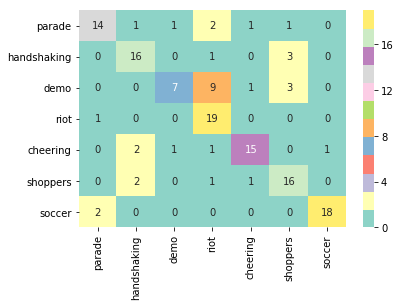

In [24]:
# display the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import pandas as pd
print ("[INFO] confusion matrix")

# get the list of training lables
#labels = sorted(list(os.listdir(test_path)))

# plot the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
cm_df = pd.DataFrame(cm,
                     index = ['parade','handshaking','demo','riot','cheering','shoppers','soccer'], 
                     columns = ['parade','handshaking','demo','riot','cheering','shoppers','soccer'])
sns.heatmap(cm_df,
            annot=True,
            cmap="Set3")

plt.show()

In [23]:
predicted_classes

array([1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 4, 1, 1,
       5, 1, 3, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 3, 2, 2, 2,
       2, 2, 3, 2, 3, 5, 5, 3, 4, 3, 5, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 4, 1, 4, 2, 6, 4, 4, 4, 3, 5, 1, 5, 5, 5, 1, 5, 3, 5, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 0, 6, 0, 6, 6])